In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
files = glob.glob(
    '/Users/tylerviducic/dev/hockey_analytics/gamescore_model/data/cleaned_data/whole_season/*.csv')

In [3]:
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df['game_goal_diff'] = np.where(df['home_or_away'] == 'HOME', df['home_score'] -
                                df['away_score'], df['away_score'] - df['home_score'])
df['on_ice_goal_diff'] = np.where(True, df['OnIce_F_goals'] - df['OnIce_A_goals'], 0)
df['on_ice_xgoal_diff'] = np.where(True, df['OnIce_F_xGoals'] - df['OnIce_A_xGoals'], 0)

In [18]:
features = ['I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_goals', 'I_F_hits', 'I_F_takeaways',
            'I_F_dZoneGiveaways', 'shotsBlockedByPlayer', 'faceoffsWon', 'faceoffsLost', 'penalties',
            'penaltiesDrawn', 'on_ice_goal_diff', 'on_ice_xgoal_diff']
target = ['game_goal_diff']
labels = features + target

In [19]:
model_df = df[labels]

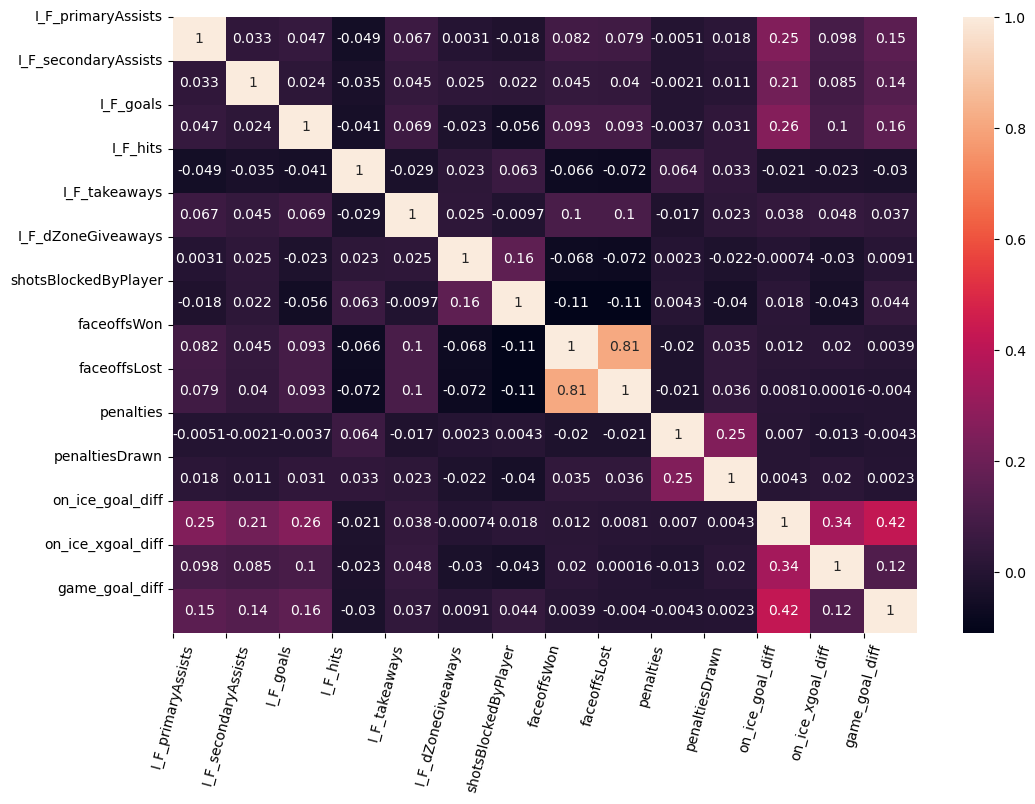

In [20]:
model_corrs = model_df.corr()
fig, ax = plt.subplots(figsize=[12, 8])
labels = features + target
plot = sns.heatmap(model_corrs, annot=True)
xaxis = np.arange(len(labels))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(labels, rotation=75)
ax.set_yticklabels(labels)
plt.show()

In [21]:
# important_features = ['I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_goals', 'I_F_takeaways',
#                       'shotsBlockedByPlayer', 'OnIce_F_xGoals', 'OnIce_F_goals', 'OnIce_A_xGoals', 'OnIce_A_goals', 'game_goal_diff']
important_features = ['I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_goals', 'I_F_takeaways',
                      'shotsBlockedByPlayer', 'on_ice_goal_diff', 'on_ice_xgoal_diff', 'game_goal_diff']

In [22]:
important_df = df[important_features]

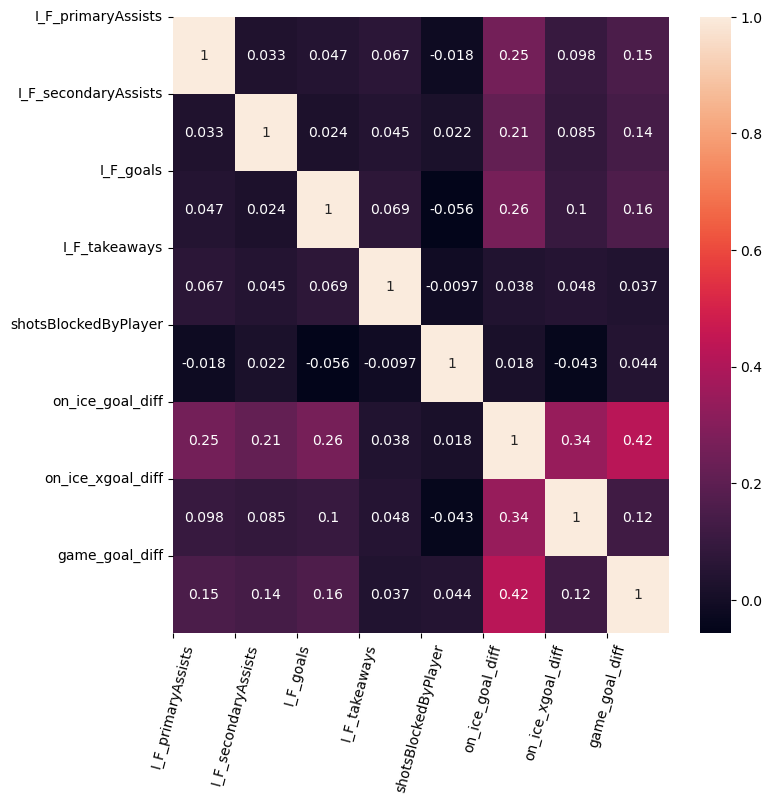

In [23]:
corrs = important_df.corr()
fig, ax = plt.subplots(figsize=[8, 8])
labels = features + target
plot = sns.heatmap(corrs, annot=True)
xaxis = np.arange(len(important_features))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(important_features, rotation=75)
ax.set_yticklabels(important_features)
plt.show()